### Calculate the area needed to build reservoirs

In [1]:
#importing functions
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
path = os.getcwd()
home_path = os.path.dirname(os.path.dirname(path))
from matplotlib import image as mpimg

In [2]:
#calculated demand (m3) for the different regions
demand = pd.read_excel(f'{home_path}\\data\\Volta_ERA5_lat_lon\water_demands_dimensions.xlsx', nrows=13, index_col = 2)

In [3]:
demand_year = demand.iloc[:,18]
demand_gs = demand.iloc[:,19]
dryspells = demand.iloc[:,12]

In [4]:
#evaporation
index = ['Januari', 'Februari', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
evaporation = pd.read_csv(f'{home_path}\\data\\Evaporation\Monthly PET_new.txt', names = ['Evaporation_mm_month'], usecols = [0])
evaporation['month'] = index
evaporation = evaporation.set_index('month')
evaporation

,Evaporation_mm_month
month,
Januari,148.847442
Februari,157.791024
March,197.343776
April,197.493216
May,188.854982
June,162.612074
July,151.108220
August,143.940461
September,147.883243


### Calculation dimensions of reservoir taken evaporation into account

- For the relation between the area (m2) of a reservoir and its volume, we used the source: https://www.researchgate.net/publication/223996631_Towards_an_atlas_of_lakes_and_reservoirs_in_Burkina_Faso, which gave a factor of 1.54 (so the average fixed height).
- To calculate the design volume, taken evaporation into account, the following formula is used:
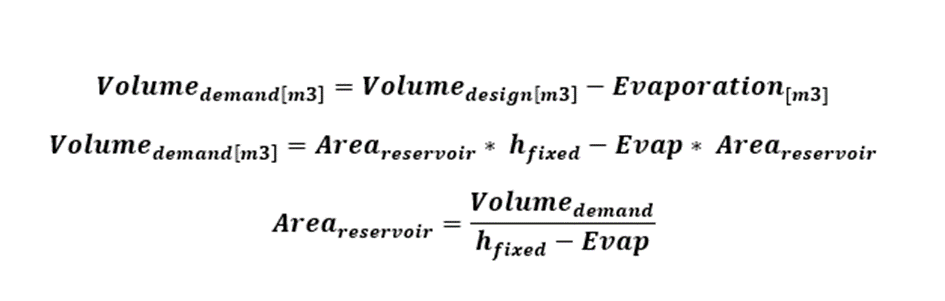 

In [5]:
#write functions to calculate dimensions, period of 5months drought (november-march)
evap_drought = evaporation.iloc[-2:,0].sum() + evaporation.iloc[0:3,0].sum() #evaporation november-march
a = 1.54 #factor, relation volume and area 
area1 = demand_year / (a - (evap_drought*10**-3))
dimension_reservoir = pd.DataFrame(data = area1)
dimension_reservoir = dimension_reservoir.rename(columns={"m3_reservoir (year)":"Area m2"})
dimension_reservoir['Volume [m3]'] = dimension_reservoir*a
dimension_reservoir

,Area m2,Volume [m3]
admin1Name,,
Centre,4.069169e+07,6.266521e+07
Boucle du Mouhoun,8.142726e+07,1.253980e+08
Cascades,4.165021e+06,6.414132e+06
Centre-Est,3.437475e+07,5.293711e+07
Centre-Nord,4.714568e+07,7.260435e+07
Centre-Ouest,3.566884e+07,5.493001e+07
Centre-Sud,1.636059e+07,2.519531e+07
Est,5.531708e+07,8.518830e+07
Hauts-Bassins,3.601890e+07,5.546910e+07


The area and volume shows the dimensions that need to be covered by a reservoir, to fulfill the water demand during the given dry period. With this, the current water systems / reservoirs are NOT taken into account. It is just a total that is 'needed' to overcome the dry spell. The same holds for the calculation shown beneath.

In [7]:
#only looking at the growing season. Take evaporation in worst month of growing season, so May.
evap_may = evaporation.loc['May'] #evaporation in worst month
evap_may_day = evap_may/31 #evaporation in mm/day
evapo = dryspells * int(evap_may_day) #evapoartion in mm/day times the length of the dry spell [days]

area2 = []

for i in range(len(evapo)):
    area2.append(int(demand_gs[i] / (a - (evapo[i]*10**-3))))

dimensions_gs = pd.DataFrame(data = area2, index = demand_gs.index, columns = ['Area [m2]'])
dimensions_gs['Volume [m3]'] = dimensions_gs['Area [m2]']*a
dimensions_gs

,Area [m2],Volume [m3]
admin1Name,,
Centre,2154485,3317906.90
Boucle du Mouhoun,6327991,9745106.14
Cascades,0,0.00
Centre-Est,1971660,3036356.40
Centre-Nord,8433828,12988095.12
Centre-Ouest,1635679,2518945.66
Centre-Sud,799825,1231730.50
Est,2914628,4488527.12
Hauts-Bassins,835853,1287213.62


In [13]:
# dimensions_gs.to_excel('dimensions_gs.xlsx')
# dimension_reservoir.to_excel('dimensions_yearly.xlsx')